In [ ]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 114.6 MB/s eta 0:00:00


In [ ]:
# Deutsch Algorithm using Qiskit 2.x
# Compatible with Qiskit 2.0+ (2024–2025)

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

# Choose the function type: 'constant_0', 'constant_1', 'balanced_0', 'balanced_1'
function_type = 'balanced_1'

def deutsch_oracle(qc, function_type):
    """Implements oracle Uf for given function type."""
    if function_type == 'constant_0':
        # f(x)=0 → Do nothing
        pass
    elif function_type == 'constant_1':
        # f(x)=1 → Apply X on the output qubit
        qc.x(1)
    elif function_type == 'balanced_0':
        # f(x)=x → Apply CNOT (control: input, target: output)
        qc.cx(0, 1)
    elif function_type == 'balanced_1':
        # f(x)=NOT(x) → Apply X, then CNOT, then X
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)

In [ ]:
# Step 1: Initialize quantum circuit with 2 qubits and 1 classical bit
qc = QuantumCircuit(2, 1)

# Step 2: Initialize |x>|y> = |0>|1> and apply Hadamard
qc.x(1)             # Set output qubit to |1>
qc.barrier()
qc.h([0, 1])        # Apply Hadamard to both qubits

# Step 3: Apply the oracle
qc.barrier()
deutsch_oracle(qc, function_type)

In [ ]:
# Step 4: Apply Hadamard to input qubit
qc.barrier()
qc.h(0)

# Step 5: Measure the first qubit
qc.measure(0, 0)

# Visualize circuit
print(qc.draw(output="text"))

           ░ ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ └───┘┌─┴─┐└───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░──────┤ X ├──────░───────╫─
     └───┘ ░ └───┘ ░      └───┘      ░       ║ 
c: 1/════════════════════════════════════════╩═
                                             0 


In [ ]:
# Step 6: Simulate
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

print("\nMeasurement results:", counts)

# Interpret result
if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")


Measurement results: {'1': 1024}
→ Function is BALANCED.


In [11]:
#--------------------Task1. Custom Oracle Design
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def dj_oracle_xor1(qc, input_qubit, output_qubit):
    # Implements f(x) = x XOR 1
    # Equivalent to flipping output when input=0
    qc.x(input_qubit)
    qc.cx(input_qubit, output_qubit)
    qc.x(input_qubit)

# Build the circuit
qc = QuantumCircuit(2, 1)
qc.x(1)
qc.h([0, 1])
qc.barrier()

# Apply custom XOR oracle
dj_oracle_xor1(qc, 0, 1)

qc.barrier()
qc.h(0)
qc.measure(0, 0)

sim = AerSimulator()
result = sim.run(transpile(qc, sim)).result()
counts = result.get_counts()
print("Measurement results:", counts)

if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")

Measurement results: {'1': 1024}
→ Function is BALANCED.


In [12]:
#-------------------Task 2: Bloch Sphere Visualization
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# Initial |0>|1>
qc = QuantumCircuit(2)
qc.x(1)
qc.h([0, 1])
state_after_h = Statevector(qc)
plot_bloch_multivector(state_after_h)
plt.show()

# After oracle
dj_oracle_xor1(qc, 0, 1)
state_after_oracle = Statevector(qc)
plot_bloch_multivector(state_after_oracle)
plt.show()

In [13]:
#-------------Task 3: Deutsch–Jozsa Extension (2-qubit input)
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

def dj2_oracle_balanced(qc):
    # f(x1, x2) = x1 XOR x2 → CNOT(0→2), CNOT(1→2)
    qc.cx(0, 2)
    qc.cx(1, 2)

# Build 3-qubit circuit (2 inputs + 1 output)
qc = QuantumCircuit(3, 2)
qc.x(2)
qc.h([0, 1, 2])
qc.barrier()

dj2_oracle_balanced(qc)
qc.barrier()
qc.h([0, 1])
qc.measure([0, 1], [0, 1])

sim = AerSimulator()
result = sim.run(transpile(qc, sim)).result()
counts = result.get_counts()
print("Measurement results:", counts)

Measurement results: {'11': 1024}


Noisy Measurement results: {'10': 66, '00': 67, '11': 795, '01': 96}


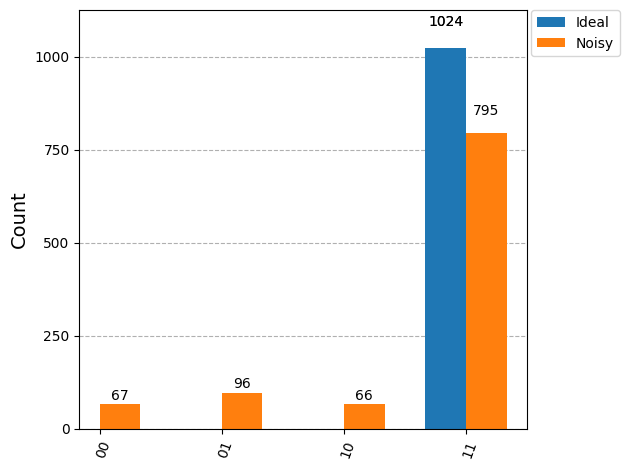

In [14]:
#------------------Task 4: Noise Impact Simulation
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram

# Create a noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 1), ['h', 'x'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.1, 2), ['cx'])

sim_noisy = AerSimulator(noise_model=noise_model)

result_noisy = sim_noisy.run(transpile(qc, sim_noisy)).result()
counts_noisy = result_noisy.get_counts()

print("Noisy Measurement results:", counts_noisy)
plot_histogram([counts, counts_noisy], legend=["Ideal", "Noisy"])

In [15]:
#-------------Task 5: Compare Classical vs Quantum Queries
import random

# Classical evaluator
def classical_check(f):
    results = [f(0), f(1)]
    if results[0] == results[1]:
        return "CONSTANT"
    else:
        return "BALANCED"

# Define f(x) = x XOR 1
def f_classical(x): return x ^ 1

print("Classical result:", classical_check(f_classical))
print("Quantum result: BALANCED (from Deutsch algorithm)")

print("\nClassical queries used: 2")
print("Quantum queries used: 1")

Classical result: BALANCED
Quantum result: BALANCED (from Deutsch algorithm)

Classical queries used: 2
Quantum queries used: 1
